Loading 1800 files for action: down
Loading 1800 files for action: water


c:\Users\silve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,850 (292.38 KB)

 Trainable params: 74,850 (292.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - acc: 0.4688 - loss: 0.6501
Epoch 1: val_acc improved from -inf to 1.00000, saving model to my_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - acc: 0.7365 - loss: 0.5087 - val_acc: 1.0000 - val_loss: 0.0775 - learning_rate: 0.0010
Epoch 2/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 1.0000 - loss: 0.0583
Epoch 2: val_acc did not improve from 1.00000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9963 - loss: 0.0641 - val_acc: 1.0000 - val_loss: 0.0182 - learning_rate: 0.0010
Epoch 3/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 1.0000 - loss: 0.0037
Epoch 3: val_acc did not improve from 1.00000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9911 - loss: 0.0420 - val_acc: 1.0000 - val_loss: 0.1269 - learning_rate: 0.0010
Epoch 4/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 1.0000 - loss: 0.1046
Epoch 4: val_acc did not improve from 1.00000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9963 - loss: 0.0786 - val_acc: 1.0000 - va

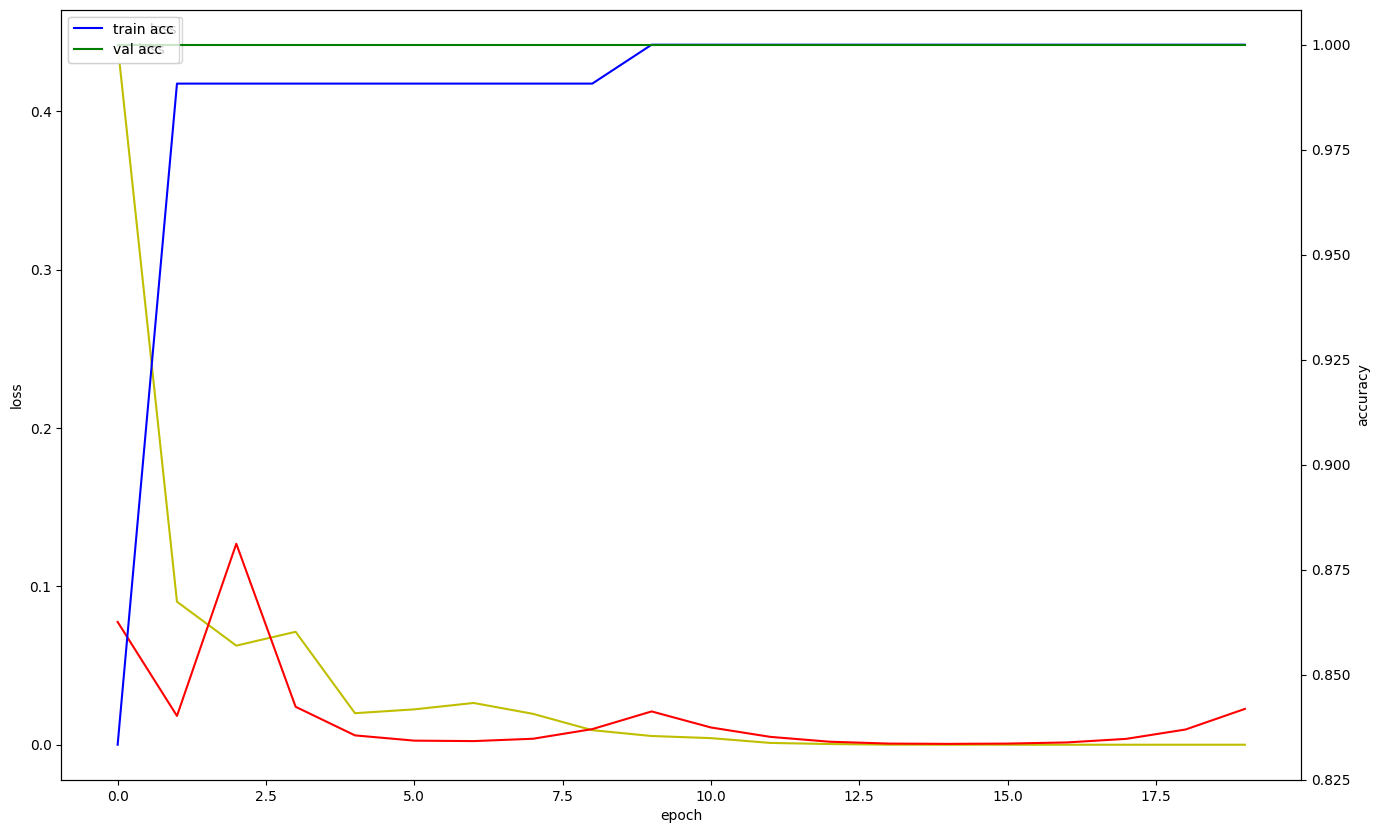

In [5]:
# %%

# 필요한 라이브러리 임포트
import numpy as np
import os
import glob
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 데이터 디렉토리 경로 설정
PATH = os.path.join('data')

# 데이터 디렉토리의 내용을 리스트로 만들어 액션(행동) 레이블 배열 생성
actions = np.array(os.listdir(PATH))

# 시퀀스와 프레임의 수 정의
seq_length = 30

# 데이터 로드 함수
def load_data(action, seq_length, data_path):
    data_files = glob.glob(os.path.join(data_path, action, '*', '*.npy'))
    print(f"Loading {len(data_files)} files for action: {action}")  # 디버그 출력
    data = []
    for file in data_files:
        npy_data = np.load(file)
        if npy_data.shape != (1, 219):  # 올바른 형태인지 확인
            print(f"Skipping file: {file}, shape: {npy_data.shape}")  # 디버그 출력
            continue
        data.append(npy_data)
    data = np.array(data)
    if len(data) < seq_length:
        return np.array([]), np.array([])
    
    # 데이터를 (시퀀스 길이, 특징) 형태로 변환
    data = data.reshape(-1, seq_length, 219)
    
    x_data = data[:, :seq_length, :]  # 데이터를 3차원 배열로 보장
    labels = np.array([label_map[action]] * len(x_data))
    return x_data, labels

# 각 액션 레이블을 숫자 값으로 매핑하는 레이블 맵 생성
label_map = {label:num for num, label in enumerate(actions)}  # 예: {water: 0, down: 1}

# 각 액션에 대한 데이터 로드
data_path = PATH
x_data, y_data = [], []
for action in actions:
    x, y = load_data(action, seq_length, data_path)
    if x.size > 0 and y.size > 0:  # 데이터가 비어 있지 않은 경우
        x_data.append(x)
        y_data.append(y)
    else:
        print(f"No valid data for action: {action}")  # 디버그 출력

# 로드된 데이터가 있는 경우 데이터를 결합
if len(x_data) > 0 and len(y_data) > 0:
    x_data = np.concatenate(x_data, axis=0)
    y_data = np.concatenate(y_data, axis=0)
else:
    print("No data available for training.")
    exit()

# 라벨 인코딩
y_data = to_categorical(y_data, num_classes=len(actions))

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021, stratify=y_data)

# 모델 구성
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, x_data.shape[2])),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

# 모델 훈련
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    callbacks=[
        ModelCheckpoint('my_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

# 훈련 결과 시각화
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()



